In [2]:
import warnings
warnings.filterwarnings('ignore')
from explanation.enumerate import * 
from interaction.user_interaction import * 
from interaction.objectives_parsing import * 
%matplotlib inline

## 5.1. Use by a lay user to enhance trust

Interacting at the context level by answering questions

In [3]:
print("LIST OF QUESTIONS")
objectives = collect_answers(GENERIC_QUESTIONS)

requirements, other_param = user_input_parsing(objectives)

base = other_param['base']
print("COMPUTING THE EXPLANATION")
best_expl = select_explanation(base, requirements)

LIST OF QUESTIONS
Please answer the following question. 
          Note that any question can be skipped by returning nothing, but the first one, which is mandatory. 
Choose a data set: 
	- Iris flower database (I), 
	- German credit (G), 
	- Adult income (A), 
	- Mnist (M), 
	- ImageNet (Im), 
	- Airline sentiment (Ar).
A
45222/45222 [==============================] - 1s 11us/step
 Are you interested in global (G) or local (L) explanations?
G
How do you want to be considered by IBEX: 
	- Technical Expert (TE), 
	- Lay User (LU), 
	- Domain Expert (DE), 
	- AUditor '(AU)? 
LU
What is the objective of the explanation: 
	- increasing Truth (T), 
	- Challenging (C)?
T
45222/45222 [==============================] - 1s 11us/step
COMPUTING THE EXPLANATION
45222/45222 [==============================] - 1s 14us/step
4  explanations have been generated. 


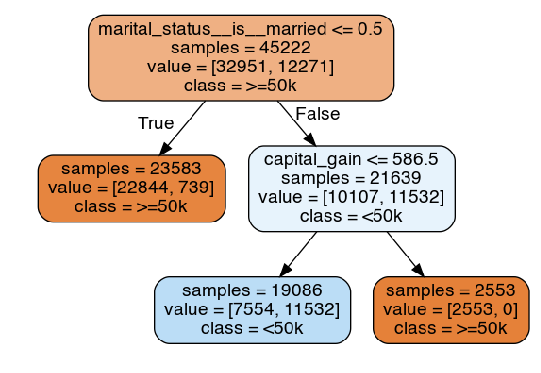

In [4]:
best_expl.deliver()

Reacting to an explanation by changing one requirement

45222/45222 [==============================] - 1s 14us/step 


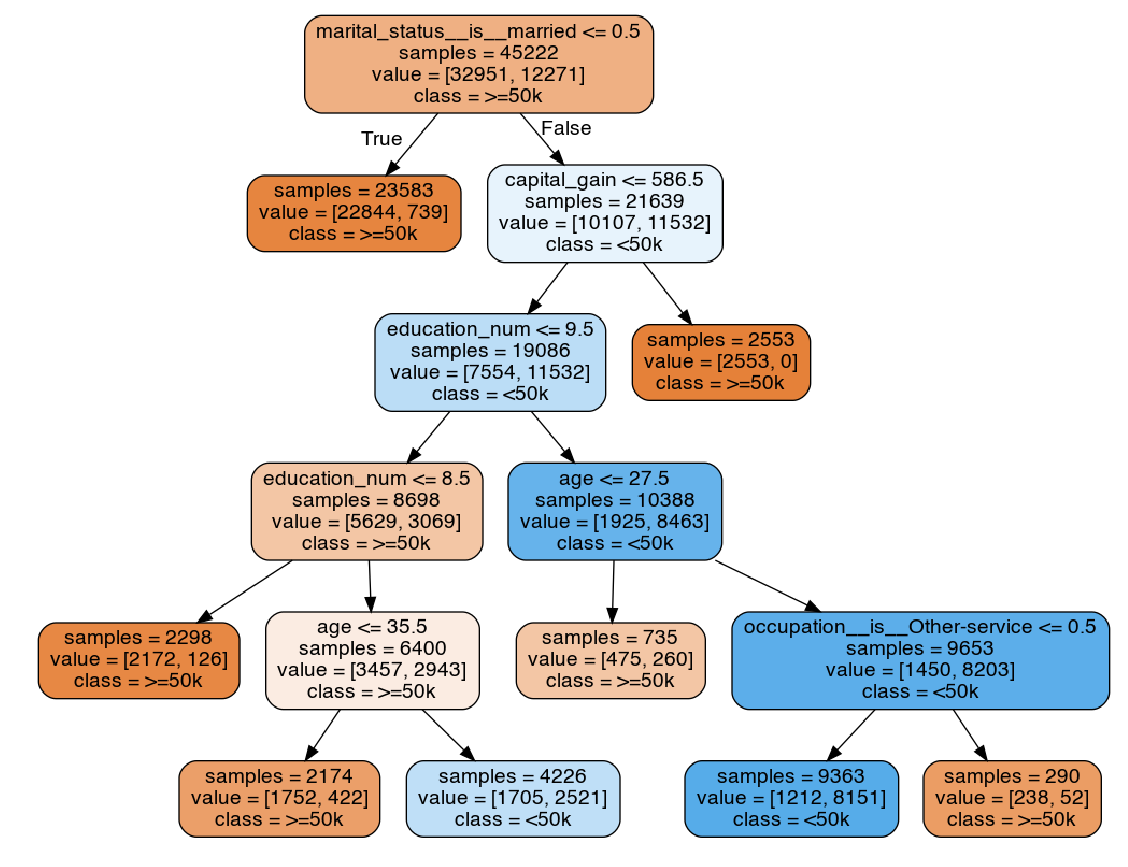

In [5]:
best_expl.react(less='simplicity')
best_expl.deliver()

## 5.2. Use by a domain expert to enhance trust

In [4]:
context = {
 'base': 'airline',
 'focus': 'local',
 'local_focus': 0,
 'profil': 'domain_expert',
 'objective': 'trust'
}

requirements, other_param = user_input_parsing(context)

base = other_param['base']

Example 1

In [3]:
base.init_scope(12330)
base.display(base.scope)
print("Predicted as", base.class_names[base.scope_pred])
best_expl = select_explanation(base, requirements)
best_expl.deliver()

['americanair although you have no control of the weather you came through with a great customer service']
Predicted as positive
8  explanations have been generated. 
IF
        great and weather
        appear in the text
THEN
    output is positive


Example 2

['southwestair jason 108639 at gate 3 in san made my afternoon southwestairlines stellarservice thanks']
Predicted as positive
0
0
0
8  explanations have been generated. 


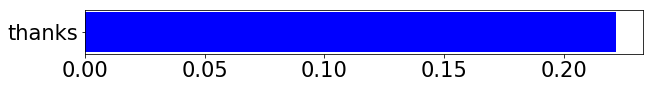

In [6]:
base.init_scope(5804)
base.display(base.scope)
print("Predicted as", base.class_names[base.scope_pred])
best_expl = select_explanation(base, requirements)
best_expl.deliver()

Example 3

In [5]:
base.init_scope(13497)
base.display(base.scope)
print("Predicted as", base.class_names[base.scope_pred])
best_expl = select_explanation(base, requirements)
best_expl.deliver()

['americanair all right but can you give me an email to write to']
Predicted as neutral
0
0
0
4  explanations have been generated. 
Relaxing requirement : realism
0
0
0
0
0
0
8  explanations have been generated. 
Relaxing requirement : generality
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27  explanations have been generated. 
IF
        can and right
        appear in the text
THEN
    output is neutral


Example 4

In [8]:
base.init_scope(197)
base.display(base.scope)
print("Predicted as", base.class_names[base.scope_pred])
comparative_table = enumerate_explanations(base, requirements)
best_expl = select_explanation(base, requirements)
best_expl.deliver()

["virginamerica you have any flights flying into boston tomorrow i need to be home and you cancelled flightled my flight and didn't do anything"]
Predicted as negative
0
0
0
0
0
0
0
0
0
0
0
0
9  explanations have been generated. 
IF
        cancelled
        appear in the text
THEN
    output is negative


Example 5

In [6]:
base.init_scope(4614)
base.display(base.scope)
print("Predicted as", base.class_names[base.scope_pred])
comparative_table = enumerate_explanations(base, requirements)
best_expl = select_explanation(base, requirements)
best_expl.deliver()

['southwestair what can we do to bring you back to jackson ms we miss you terribly around here these other airlines are horrible']
Predicted as negative
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27  explanations have been generated. 
IF
        horrible
        appear in the text
THEN
    output is negative


## 5.3. Use by a lay user to take actions

In [11]:
context = {
 'base': 'german',
 'focus': 'local',
 'local_focus': 0,
 'profil': 'lay_user',
 'objective': 'decision'
}

requirements, other_param = user_input_parsing(context)

base = other_param['base']

# requirements['simple'] = 1

base.init_scope(285)
# base.init_scope(5440)
base.display(base.scope)
print(base.scope_pred)
print(base.scope.index.values[0])
actionables = ['credit_amount', 'duration', 'existing_credits', 'job', 'own_telephone']
best_expl = select_explanation(base, requirements, actionable_features=actionables)
best_expl.deliver()

     credit_amount  duration    purpose  existing_credits   credit_history  \
285          10722        47  'new car'                 1  'existing paid'   

    other_payment_plans property_magnitude housing checking_status  \
285                none      'real estate'     own            '<0'   

    savings_status employment                   job  age  num_dependents  \
285         '<100'       '<1'  'unskilled resident'   35               1   

     installment_commitment own_telephone       personal_status  \
285                       1           yes  'female div/dep/mar'   

    foreign_worker other_parties  residence_since  
285            yes          none                1  
1
285
0
1  explanations have been generated. 
Changing the following features: 
    duration from 47 to 36,
    own_telephone from yes to none
will reslut in changing the output of the model from bad to good


## 5.4. Use by an auditor to challenge the ADS

45222/45222 [==============================] - 1s 22us/step
      age workclass education  education_num marital_status    occupation  \
3249   47   Private   HS-grad              9        married  Craft-repair   

     relationship   race   sex  capital_gain  capital_loss  hours_per_week  \
3249      Husband  White  Male             0             0              40   

     native_country  
3249  United-States  
predicated as <50k
####### REALISM = 1 ######
HARD REQUIREMENTS:
	 actionability : False
	 generality : 1
	 realism : 1
	 nature : False
	 simplicity : 3
SOFT REQUIREMENTS: 
	 format : LA
1/1 [==============================] - 0s 659us/step


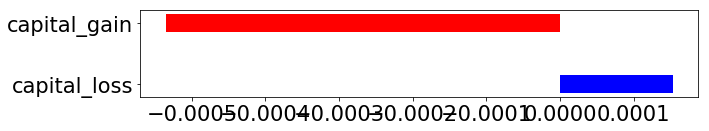

0    None
Name: explanation, dtype: object

In [20]:
context = {
 'base': 'adult',
 'focus': 'local',
 'local_focus': 3249,
 'profil': 'auditor',
 'objective': 'contesting'
}

requirements, other_param = user_input_parsing(context)

requirements['nature'] = False
requirements['format'] = [FImportanceExplanation]
base = other_param['base']
requirements['generality'] = 1
requirements['simplicity'] = 3
base.display(base.scope)
print("predicated as", base.class_names[base.scope_pred])
print("####### REALISM = 1 ######")
requirements['realism'] = 1
display_requirements(requirements)
comparative_table = enumerate_explanations(base, requirements)
comparative_table['explanation'].apply(lambda x: x.deliver())

####### REALISM = 3 ######
1/1 [==============================] - 0s 668us/step


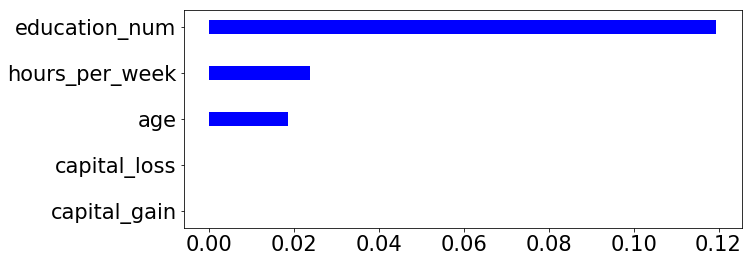

0    None
Name: explanation, dtype: object

In [17]:
print("####### REALISM = 3 ######")
requirements['realism'] = 3
comparative_table = enumerate_explanations(base, requirements)
comparative_table['explanation'].apply(lambda x: x.deliver())